# MUSHROOM PROJECT

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be’’ for Poisonous Oak and Ivy.

In [22]:
#Loading packages
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

In [23]:
df = pd.read_csv("mushrooms.csv") #loading the dataset
df.head()                         # Display top 5 rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# Exploratory data analysis

In [24]:
df.shape                 # no. of rows and columns

(8124, 23)

The dataset has 8124 rows and 23 columns

In [25]:
pd.set_option('display.max_columns',None) # display all columns

In [26]:
df.isnull().sum()                 # to check null values if any

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

The dataset has no missing value

In [27]:
df.columns     #all the columns names in the dataset

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Attributes Information 
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [28]:
df.dtypes     #datatype in each column

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

all the columns have object datatype which are needed to be converted to numeric values

In [29]:
for c in df.columns:                           # To determine the count of each value in the columnns
    print ("---- %s ---" %c)
    print (df[c].value_counts())

---- class ---
e    4208
p    3916
Name: class, dtype: int64
---- cap-shape ---
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
---- cap-surface ---
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
---- cap-color ---
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
---- bruises ---
f    4748
t    3376
Name: bruises, dtype: int64
---- odor ---
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
---- gill-attachment ---
f    7914
a     210
Name: gill-attachment, dtype: int64
---- gill-spacing ---
c    6812
w    1312
Name: gill-spacing, dtype: int64
---- gill-size ---
b    5612
n    2512
Name: gill-size, dtype: int64
---- gill-color ---
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int6

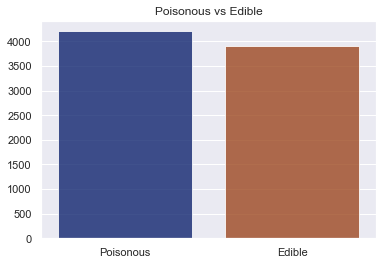

In [30]:
count = df['class'].value_counts()                                         # bar plot to check balance of target variable
sns.set(style="darkgrid")
plt=sns.barplot(count.index, count.values, alpha=0.8, palette="dark")
plt.set(xticklabels=['Poisonous','Edible'])
plt.set_title('Poisonous vs Edible');
#plt.savefig("count.jpeg", format='jpeg', dpi=300)

The target variable is balanced

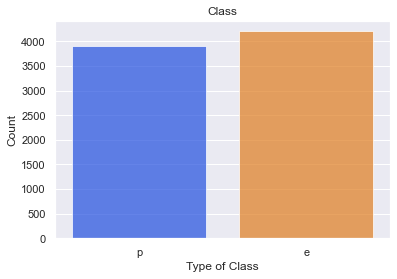

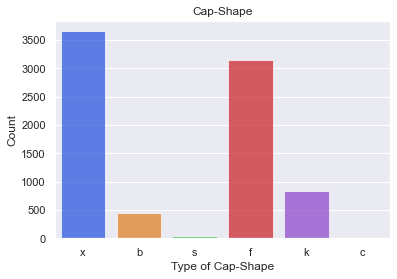

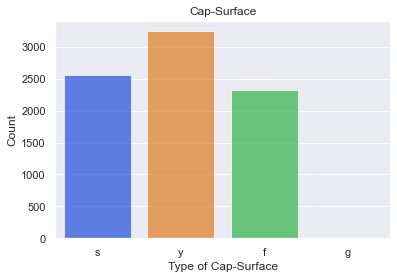

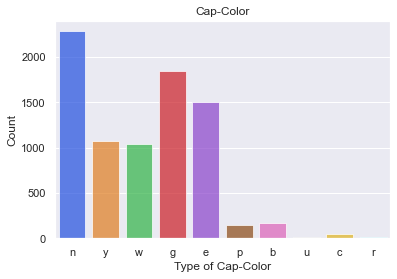

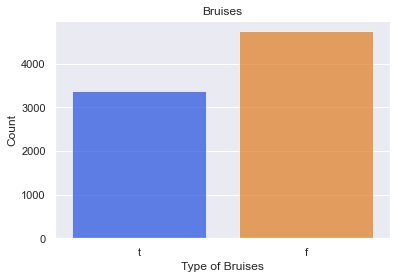

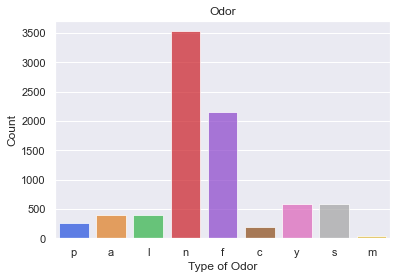

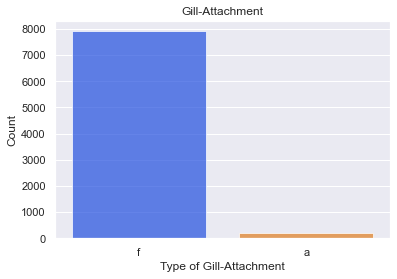

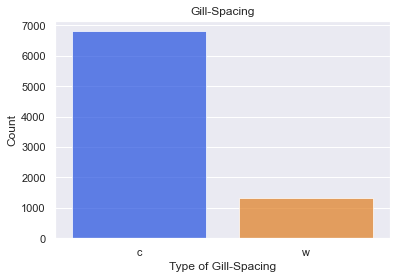

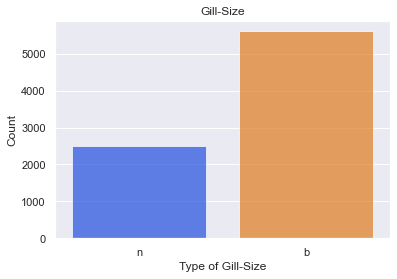

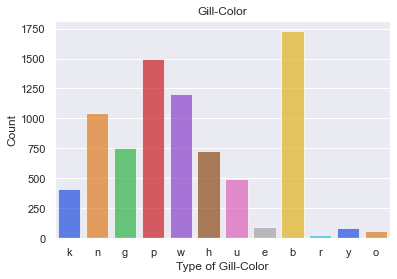

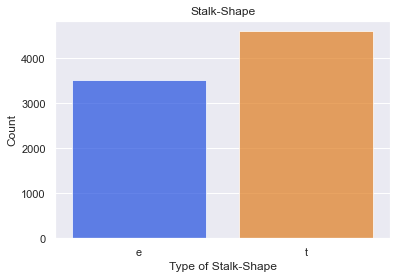

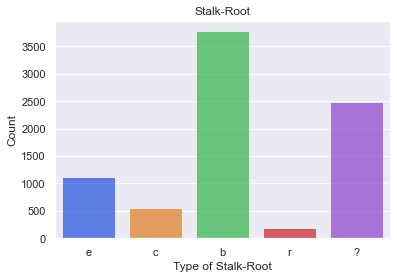

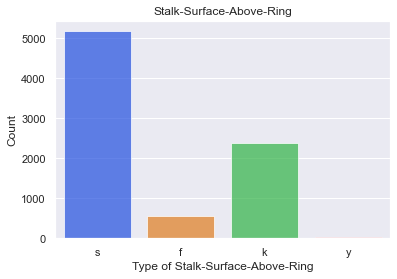

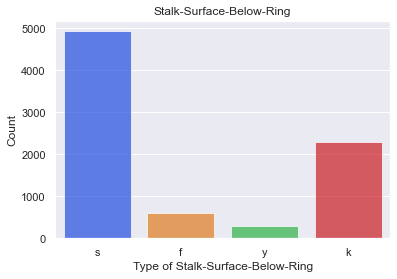

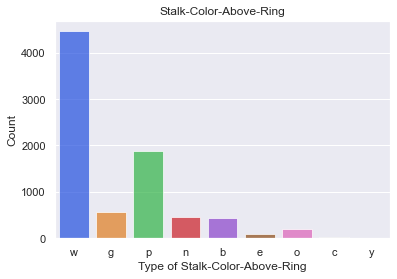

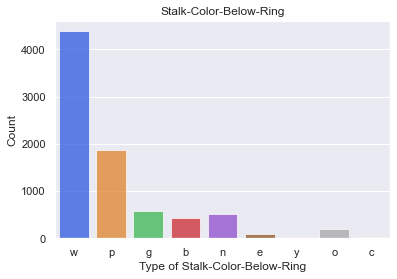

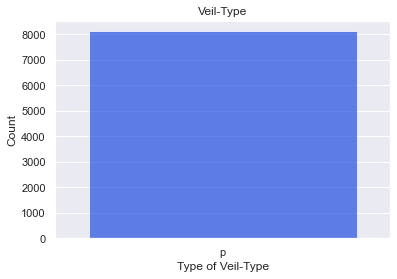

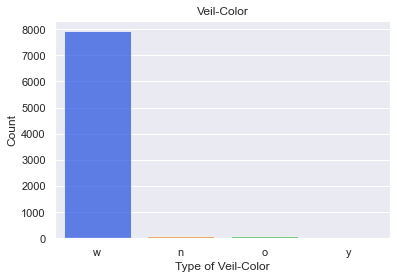

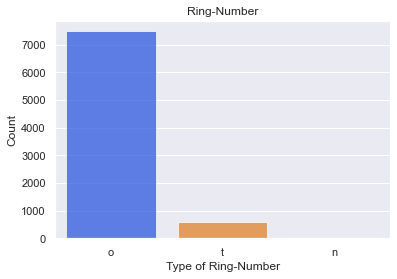

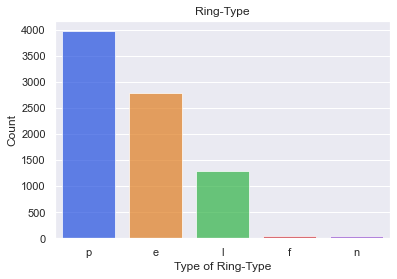

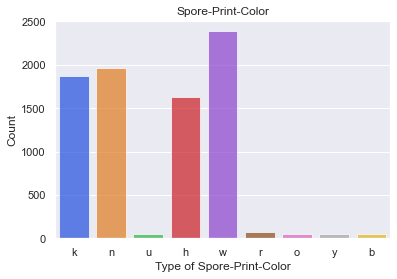

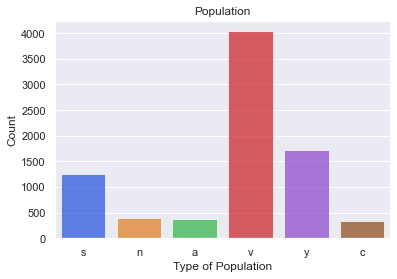

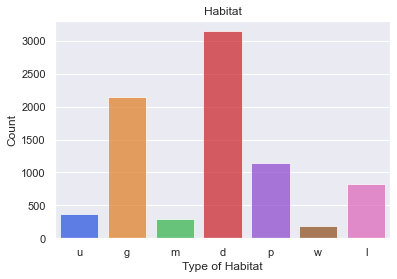

In [31]:
from matplotlib import pyplot as plt                         #to determine the count of each attribute in each column
for col in df.columns:
    sns.set_style('darkgrid')
    plt.figure()
    sns.countplot(df[col],alpha =.70,palette='bright')
    plt.ylabel('Count')
    plt.title(col.title())
    plt.xlabel('Type of' + ' ' + col.title())
plt.show()

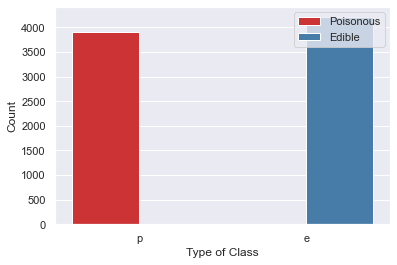

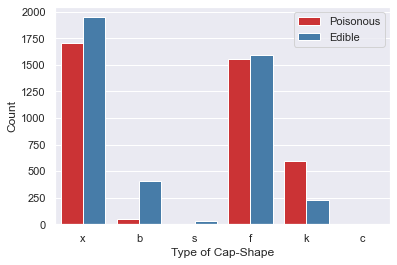

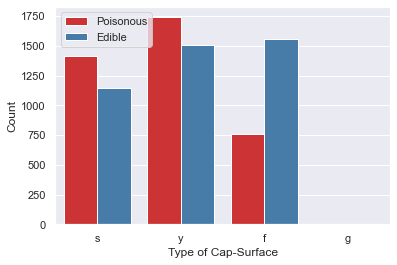

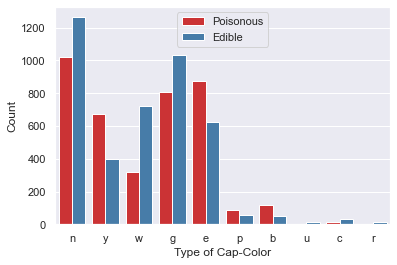

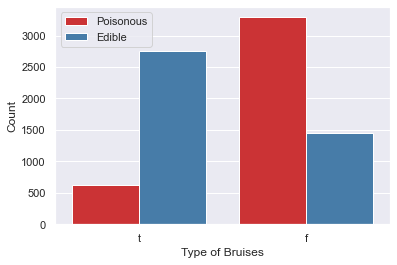

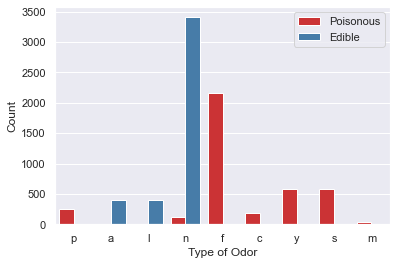

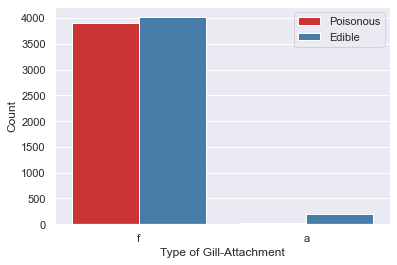

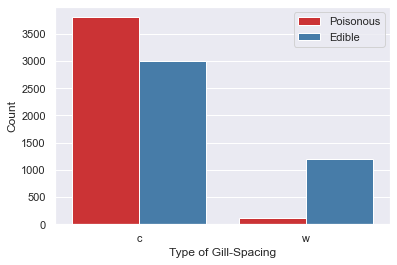

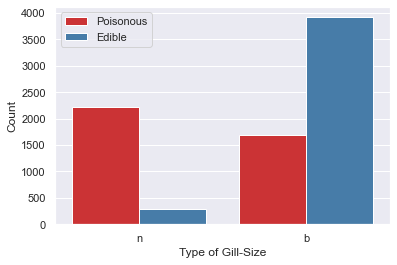

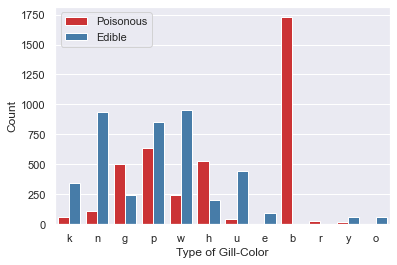

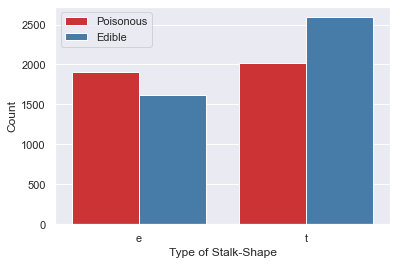

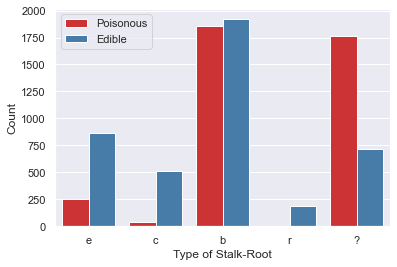

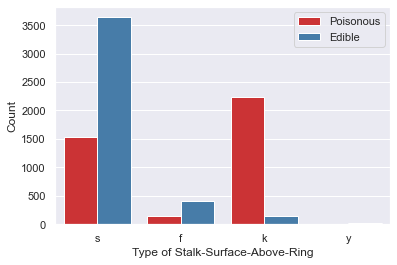

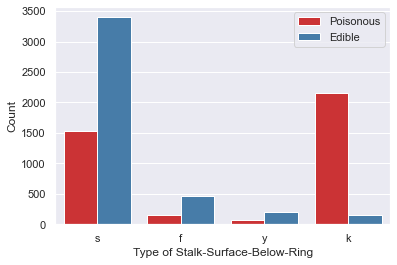

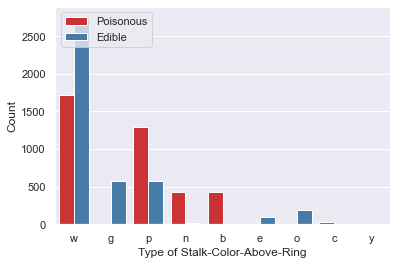

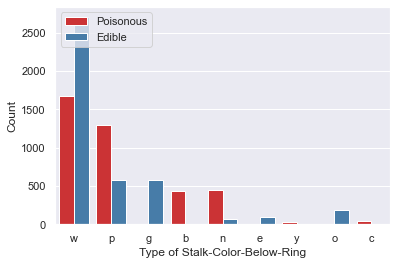

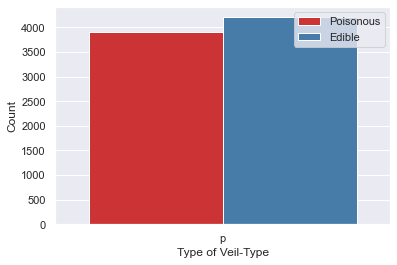

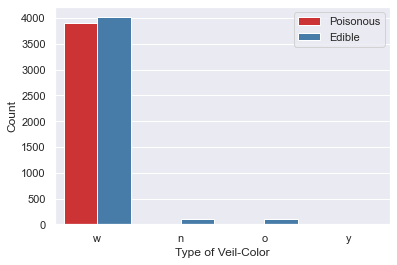

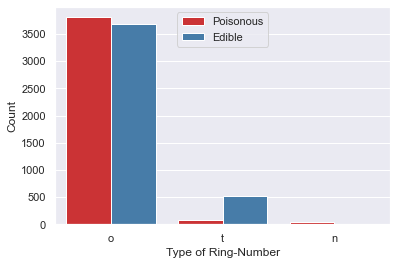

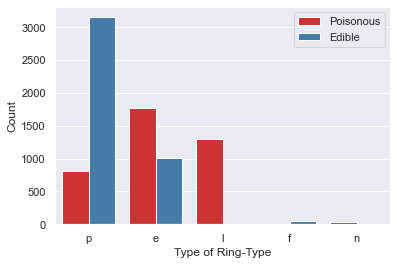

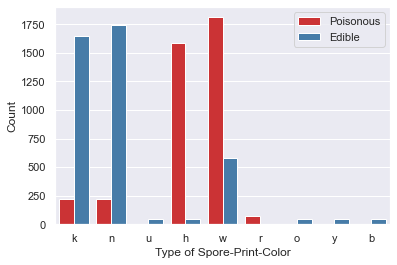

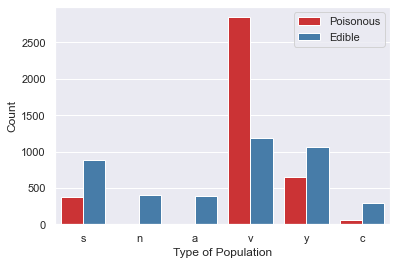

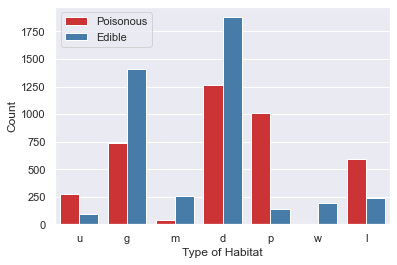

In [32]:
from matplotlib import pyplot as plt
for col in df:                                  #Plot values in each column with correspondence to class(Poisonous and Edible)
    sns.set_style('darkgrid')
    fig,ax = plt.subplots()
    ax=sns.countplot(col,hue=df['class'],palette='Set1',data=df)
    ax.set(xlabel='Type of' + ' ' + col.title(), ylabel = 'Count')
    ax.legend(title=None,labels=['Poisonous','Edible'])

Convert categorical values to numeric

In [33]:
#re-assign bruises column to 0 and 1
df['bruises']=np.where(df['bruises']=='t',1,df['bruises'])
df['bruises']=np.where(df['bruises']=='f',0,df['bruises'])

In [34]:
#assign missing values to 'other'
df['stalk-root']=np.where(df['stalk-root']=='?','other',df['stalk-root'])

In [35]:
#dropping veil-type column since values are all the same
#no use in the model
df.drop(columns='veil-type',inplace=True)

In [36]:
#re-assign to actual ring number, 0, 1, 2 -> numerical data
df['ring-number']=np.where(df['ring-number']=='n',0,df['ring-number'])
df['ring-number']=np.where(df['ring-number']=='o',1,df['ring-number'])
df['ring-number']=np.where(df['ring-number']=='t',2,df['ring-number'])

In [37]:
df.describe()     # describe dataset annotated till now

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,0,n,f,c,b,b,t,b,s,s,w,w,w,1,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [38]:
df['class']=np.where(df['class']=='e',0,1)     # assign 0 & 1 to edible and poisonous mushrooms repectively
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,f,c,n,k,e,e,s,s,w,w,w,1,p,k,s,u
1,0,x,s,y,1,a,f,c,b,k,e,c,s,s,w,w,w,1,p,n,n,g
2,0,b,s,w,1,l,f,c,b,n,e,c,s,s,w,w,w,1,p,n,n,m
3,1,x,y,w,1,p,f,c,n,n,e,e,s,s,w,w,w,1,p,k,s,u
4,0,x,s,g,0,n,f,w,b,k,t,e,s,s,w,w,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,0,n,a,c,b,y,e,other,s,s,o,o,o,1,p,b,c,l
8120,0,x,s,n,0,n,a,c,b,y,e,other,s,s,o,o,n,1,p,b,v,l
8121,0,f,s,n,0,n,a,c,b,n,e,other,s,s,o,o,o,1,p,b,c,l
8122,1,k,y,n,0,y,f,c,n,b,t,other,s,k,w,w,w,1,e,w,v,l


In [39]:
y=df['class']                                                       #assigning class column to y variable
x=df.drop(['class','bruises','ring-number'],axis=1)                 #assiging remaining catagorical columns                                    

In [40]:
df3=pd.get_dummies(x,drop_first=True)                                      # one-hot-encoding to convert data to numeric form
#creating dummies for all features that are not binary or ordinal/numeric
df3.shape

(8124, 92)

In [41]:
df3

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_other,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [42]:
#combining the dataset with target variable and dataset with numeric datatype converted in above step
df_final=pd.concat([df,df3],axis=1)
df_final

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_other,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,x,s,n,1,p,f,c,n,k,e,e,s,s,w,w,w,1,p,k,s,u,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,x,s,y,1,a,f,c,b,k,e,c,s,s,w,w,w,1,p,n,n,g,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,b,s,w,1,l,f,c,b,n,e,c,s,s,w,w,w,1,p,n,n,m,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,x,y,w,1,p,f,c,n,n,e,e,s,s,w,w,w,1,p,k,s,u,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,x,s,g,0,n,f,w,b,k,t,e,s,s,w,w,w,1,e,n,a,g,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,0,n,a,c,b,y,e,other,s,s,o,o,o,1,p,b,c,l,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8120,0,x,s,n,0,n,a,c,b,y,e,other,s,s,o,o,n,1,p,b,v,l,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8121,0,f,s,n,0,n,a,c,b,n,e,other,s,s,o,o,o,1,p,b,c,l,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,

In [43]:
for c in df_final.columns:                           # To determine the columnns in the dataset after concatenation
    print ("---- %s ---" %c)
    print (df_final[c].value_counts())

---- class ---
0    4208
1    3916
Name: class, dtype: int64
---- cap-shape ---
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
---- cap-surface ---
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
---- cap-color ---
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
---- bruises ---
0    4748
1    3376
Name: bruises, dtype: int64
---- odor ---
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
---- gill-attachment ---
f    7914
a     210
Name: gill-attachment, dtype: int64
---- gill-spacing ---
c    6812
w    1312
Name: gill-spacing, dtype: int64
---- gill-size ---
b    5612
n    2512
Name: gill-size, dtype: int64
---- gill-color ---
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int6

In [44]:
#Droping columns which are repeated during merging the two datasets 
df_final.drop(columns=['cap-shape','cap-surface','cap-color','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-type','spore-print-color','population','habitat'],inplace=True)

In [45]:
df_final   # final dataset 

,class,bruises,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_other,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8120,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8122,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [46]:
df_final.dtypes   #data type of each column

class           int32
bruises        object
ring-number    object
cap-shape_c     uint8
cap-shape_f     uint8
                ...  
habitat_l       uint8
habitat_m       uint8
habitat_p       uint8
habitat_u       uint8
habitat_w       uint8
Length: 95, dtype: object

In [47]:
#converting datatype of columns to numeric
df_final[["bruises", "ring-number"]] = df_final[["bruises", "ring-number"]].apply(pd.to_numeric)

In [48]:
df_final.dtypes   #checking final datatype of each column

class          int32
bruises        int64
ring-number    int64
cap-shape_c    uint8
cap-shape_f    uint8
               ...  
habitat_l      uint8
habitat_m      uint8
habitat_p      uint8
habitat_u      uint8
habitat_w      uint8
Length: 95, dtype: object

In [49]:
df_final.to_csv('final_mushroom_data.csv')    # saving final processed dataset

In [50]:
corr_matrix=df_final.corr()   #correlation matrix
corr_matrix

,class,bruises,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_other,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.000000,-0.501530,-0.214366,0.023007,0.018526,0.163565,-0.060664,-0.026886,0.023007,0.095454,0.088677,-0.030910,0.097112,-0.046456,-0.044360,0.034702,-0.042854,-0.042854,-0.133683,0.113014,0.161278,0.623842,-0.219529,0.069159,-0.785557,0.186984,0.286360,0.286360,0.129200,-0.348387,0.540024,-0.105491,0.120285,0.150694,-0.149641,-0.288943,-0.085962,-0.050380,0.056426,-0.195359,-0.231316,-0.046828,-0.102019,-0.218548,-0.202839,0.302001,-0.150087,0.587658,-0.491314,-0.016198,0.573524,-0.425444,-0.081674,0.069159,-0.105491,-0.266489,0.233164,-0.150087,0.230277,-0.217740,0.032545,0.069159,-0.105491,-0.266489,0.203966,-0.150087,0.230277,-0.214112,0.056426,-0.105491,0.140541,0.032545,-0.074371,0.451619,0.069159,-0.540469,0.490229,-0.396832,-0.416645,-0.074371,0.098024,-0.074371,0.357384,-0.074371,-0.137645,-0.219529,-0.159572,0.443722,-0.107055,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
bruises,-0.501530,1.000000,0.056788,0.003803,0.045188,-0.229578,-0.053026,0.048557,0.026321,-0.104439,0.124401,-0.035000,0.000426,-0.050501,-0.051746,0.038160,-0.037458,-0.037458,0.095555,-0.033564,-0.131191,-0.344642,0.269875,-0.056257,0.285171,0.213915,-0.232938,-0.232938,0.137359,-0.299473,-0.369596,0.129684,-0.138321,-0.181608,0.025677,0.211989,-0.075140,0.043856,0.064553,0.238275,0.335202,-0.087221,0.099364,0.277916,-0.151727,-0.454822,0.184507,-0.541494,0.561572,-0.045900,-0.530549,0.505796,0.100605,-0.056257,0.129684,0.327604,-0.203712,-0.131191,-0.119769,0.137021,-0.026474,-0.056257,0.129684,0.327604,-0.218691,-0.131191,-0.119769,0.153438,-0.045900,-0.092210,0.133964,-0.026474,-0.065008,-0.367368,-0.056257,0.767036,-0.243244,0.335756,0.334734,-0.065008,0.112142,0.091427,-0.416877,-0.065008,0.073229,0.103639,0.072997,-0.179268,0.162030,-0.131746,-0.278238,0.228986,-0.249460,0.143017,0.184507
ring-number,-0.214366,0.056788,1.000000,-0.005685,-0.103283,0.141875,-0.016107,-0.078334,-0.005685,0.119852,-0.097559,-0.043651,-0.079749,0.026322,-0.099568,0.240928,-0.011378,-0.011378,0.130215,-0.099863,-0.039849,-0.154142,-0.058287,-0.263230,0.325325,-0.046201,-0.070755,-0.070755,0.093236,0.243014,-0.171362,0.375438,0.106228,-0.080601,-0.058898,-0.098571,-0.022824,-0.008891,0.186883,-0.065032,0.207912,-0.106367,-0.293221,-0.134172,-0.102423,0.303560,-0.039849,-0.056607,0.076184,0.119941,-0.016073,0.090516,-0.098199,-0.263230,0.375438,-0.070755,-0.030046,-0.039849,-0.140154,0.162553,-0.008042,-0.263230,0.375438,-0.070755,-0.036526,-0.039849,-0.140154,0.167326,-0.013942,-0.028009,

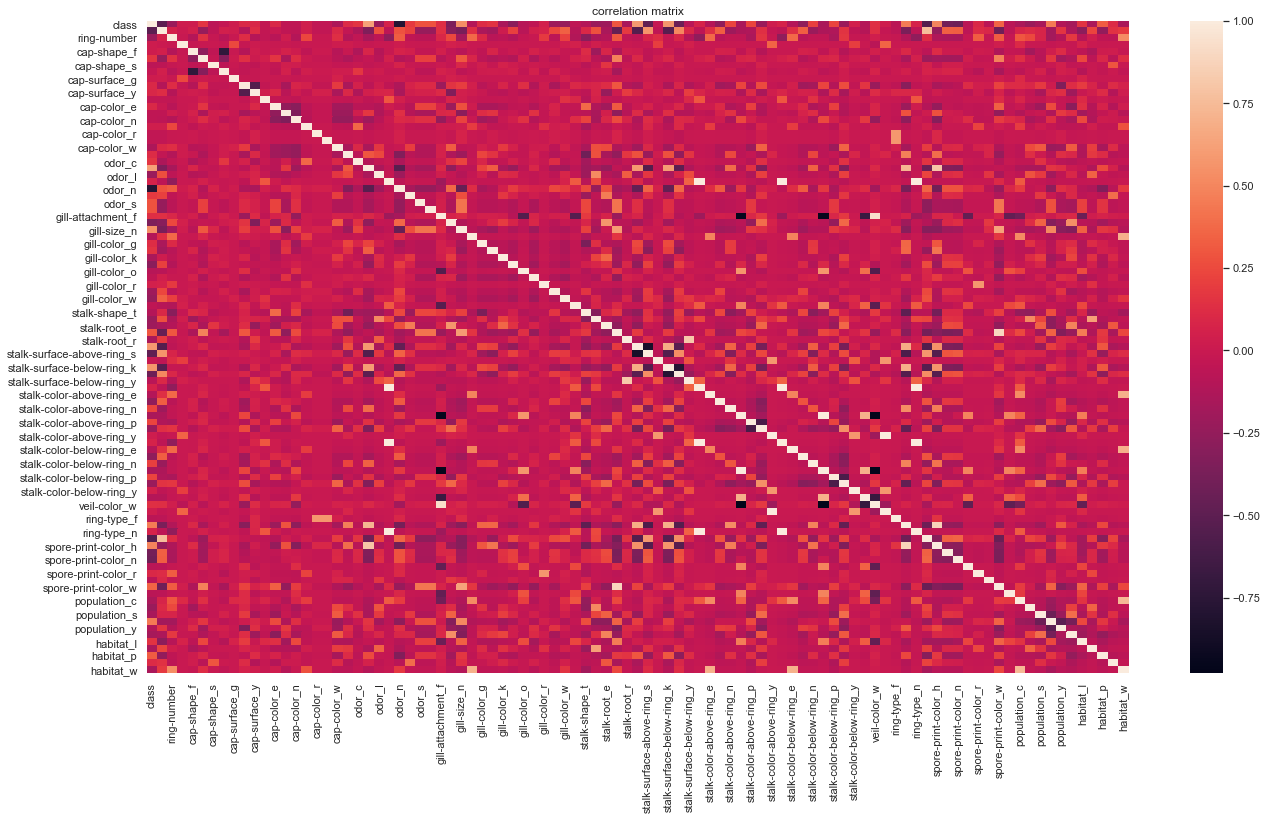

In [51]:
plt.figure(figsize=[22,12])    #plotting the correlation matrix
sns.heatmap(corr_matrix)
plt.title("correlation matrix")
plt.show()

In [52]:
#as there are large no. of columns, so displaying the correlation of each column with class 
import pandas as pd                                  
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
corr_matrix["class"].sort_values(ascending=False)

class                         1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
spore-print-color_w           0.357384
habitat_p                     0.323346
stalk-root_other              0.302001
odor_y                        0.286360
odor_s                        0.286360
stalk-color-above-ring_n      0.233164
stalk-color-below-ring_p      0.230277
stalk-color-above-ring_p      0.230277
stalk-color-below-ring_n      0.203966
odor_p                        0.186984
cap-shape_k                   0.163565
odor_c                        0.161278
habitat_l                     0.155150
gill-color_h                  0.150694
veil-color_w                  0.140541
gill-attachment_f             0.129200
gill-color_g                  0.120285
cap-color_y              

odor_n and odor_f are highly correlated to class in the dataset 

# Modeling

In [53]:
x = df_final.drop('class', axis=1)
y = df_final['class']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  1.0 on Random State:  4


Best random_state value is 4. We will create our train_test_split using random_state 4

## Creating train test split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4)

--------------------LogisticRegression-------------

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean())

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Cross Validation score of Logistic Regression:  0.880311330049261


------------------DecisionTreeClassifier-----------------

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation Scores for Decision Tree: ",scr.mean())

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Cross Validation Scores for Decision Tree:  0.9364726032588102


-------------------------RandomForestClassifier----------------

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation Scores for Random Forest: ",scr.mean())

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Cross Validation Scores for Random Forest:  0.9127041303524063


-------------------------SVC-------------------

In [59]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation Score for Support Vector Classifier: ",scr.mean())

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Cross Validation Score for Support Vector Classifier:  0.8678770746494884


## Final model

## Hyper paramete tuning

In [60]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'max_depth': np.arange(2,10),
             'criterion': ['gini','entropy']}

In [61]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [62]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [63]:
GCV.best_params_ 

{'criterion': 'gini', 'max_depth': 8}

In [64]:
mod = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=4)

mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test, pred))

1.0


## Saving the model

In [65]:
import joblib
joblib.dump(mod, 'mushroom_predictive_model.pkl')

['mushroom_predictive_model.pkl']